In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [16]:
import os, glob
import numpy as np

import IPython.display as dp


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
home = os.path.expanduser('~')
figs = 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/figures/circ_glm_figures/'
fig_path = os.path.join(home,figs)

# Estimating the decay of the the distribution of angles between vectors defined on the drift-rate / decision threshold space over time in loki_0

## The goal of this analysis is to provide an out-of-set justification for the selection of the time window used for loki_0.5 in the circular regression analysis. Reducing the span of the window also minimizes the complexity of the set of models I'm comparing, making the parameter estimates more likely to converge, requiring less time to sample, and improving interpretability of interactions. To this end, I implemented the a-v-time manifold analysis on loki_0 data to observe the decay of the angular distribution to uniformity. The point at which the angular distributions appear to stabilize will inform the endpoint of the window considered. 

**

Preprocessing steps

* calculating ideal observer parameters given the feedback schedule provided to participants
* estimating HDDM regression models to find empirically supported latent decision parameters + model selection {all pairwise combinations of learning signals and a + v, + single-parameter models) 
* generating trial-wise estimates of $a$ and $v$ from the winning regression equation 
* computing the angle between each sequential set of z-scored (a,v) points for $\Delta X$ for $\Delta X$ = 0:8
* estimating the circular regression model $\theta = \beta_0 + \Delta X$ to obtain a difference estimate in $\theta$ 


# Deviation from the reference theta distribution over time (reference vector = the first theta distribution considered, the angle formed from trial -1 to the onset of the change point (0)) is plotted below. The theta distribution on subsequent trials more closely approximates the reference theta distribution over time, with stability emerging around $\Delta_{3:4}$.



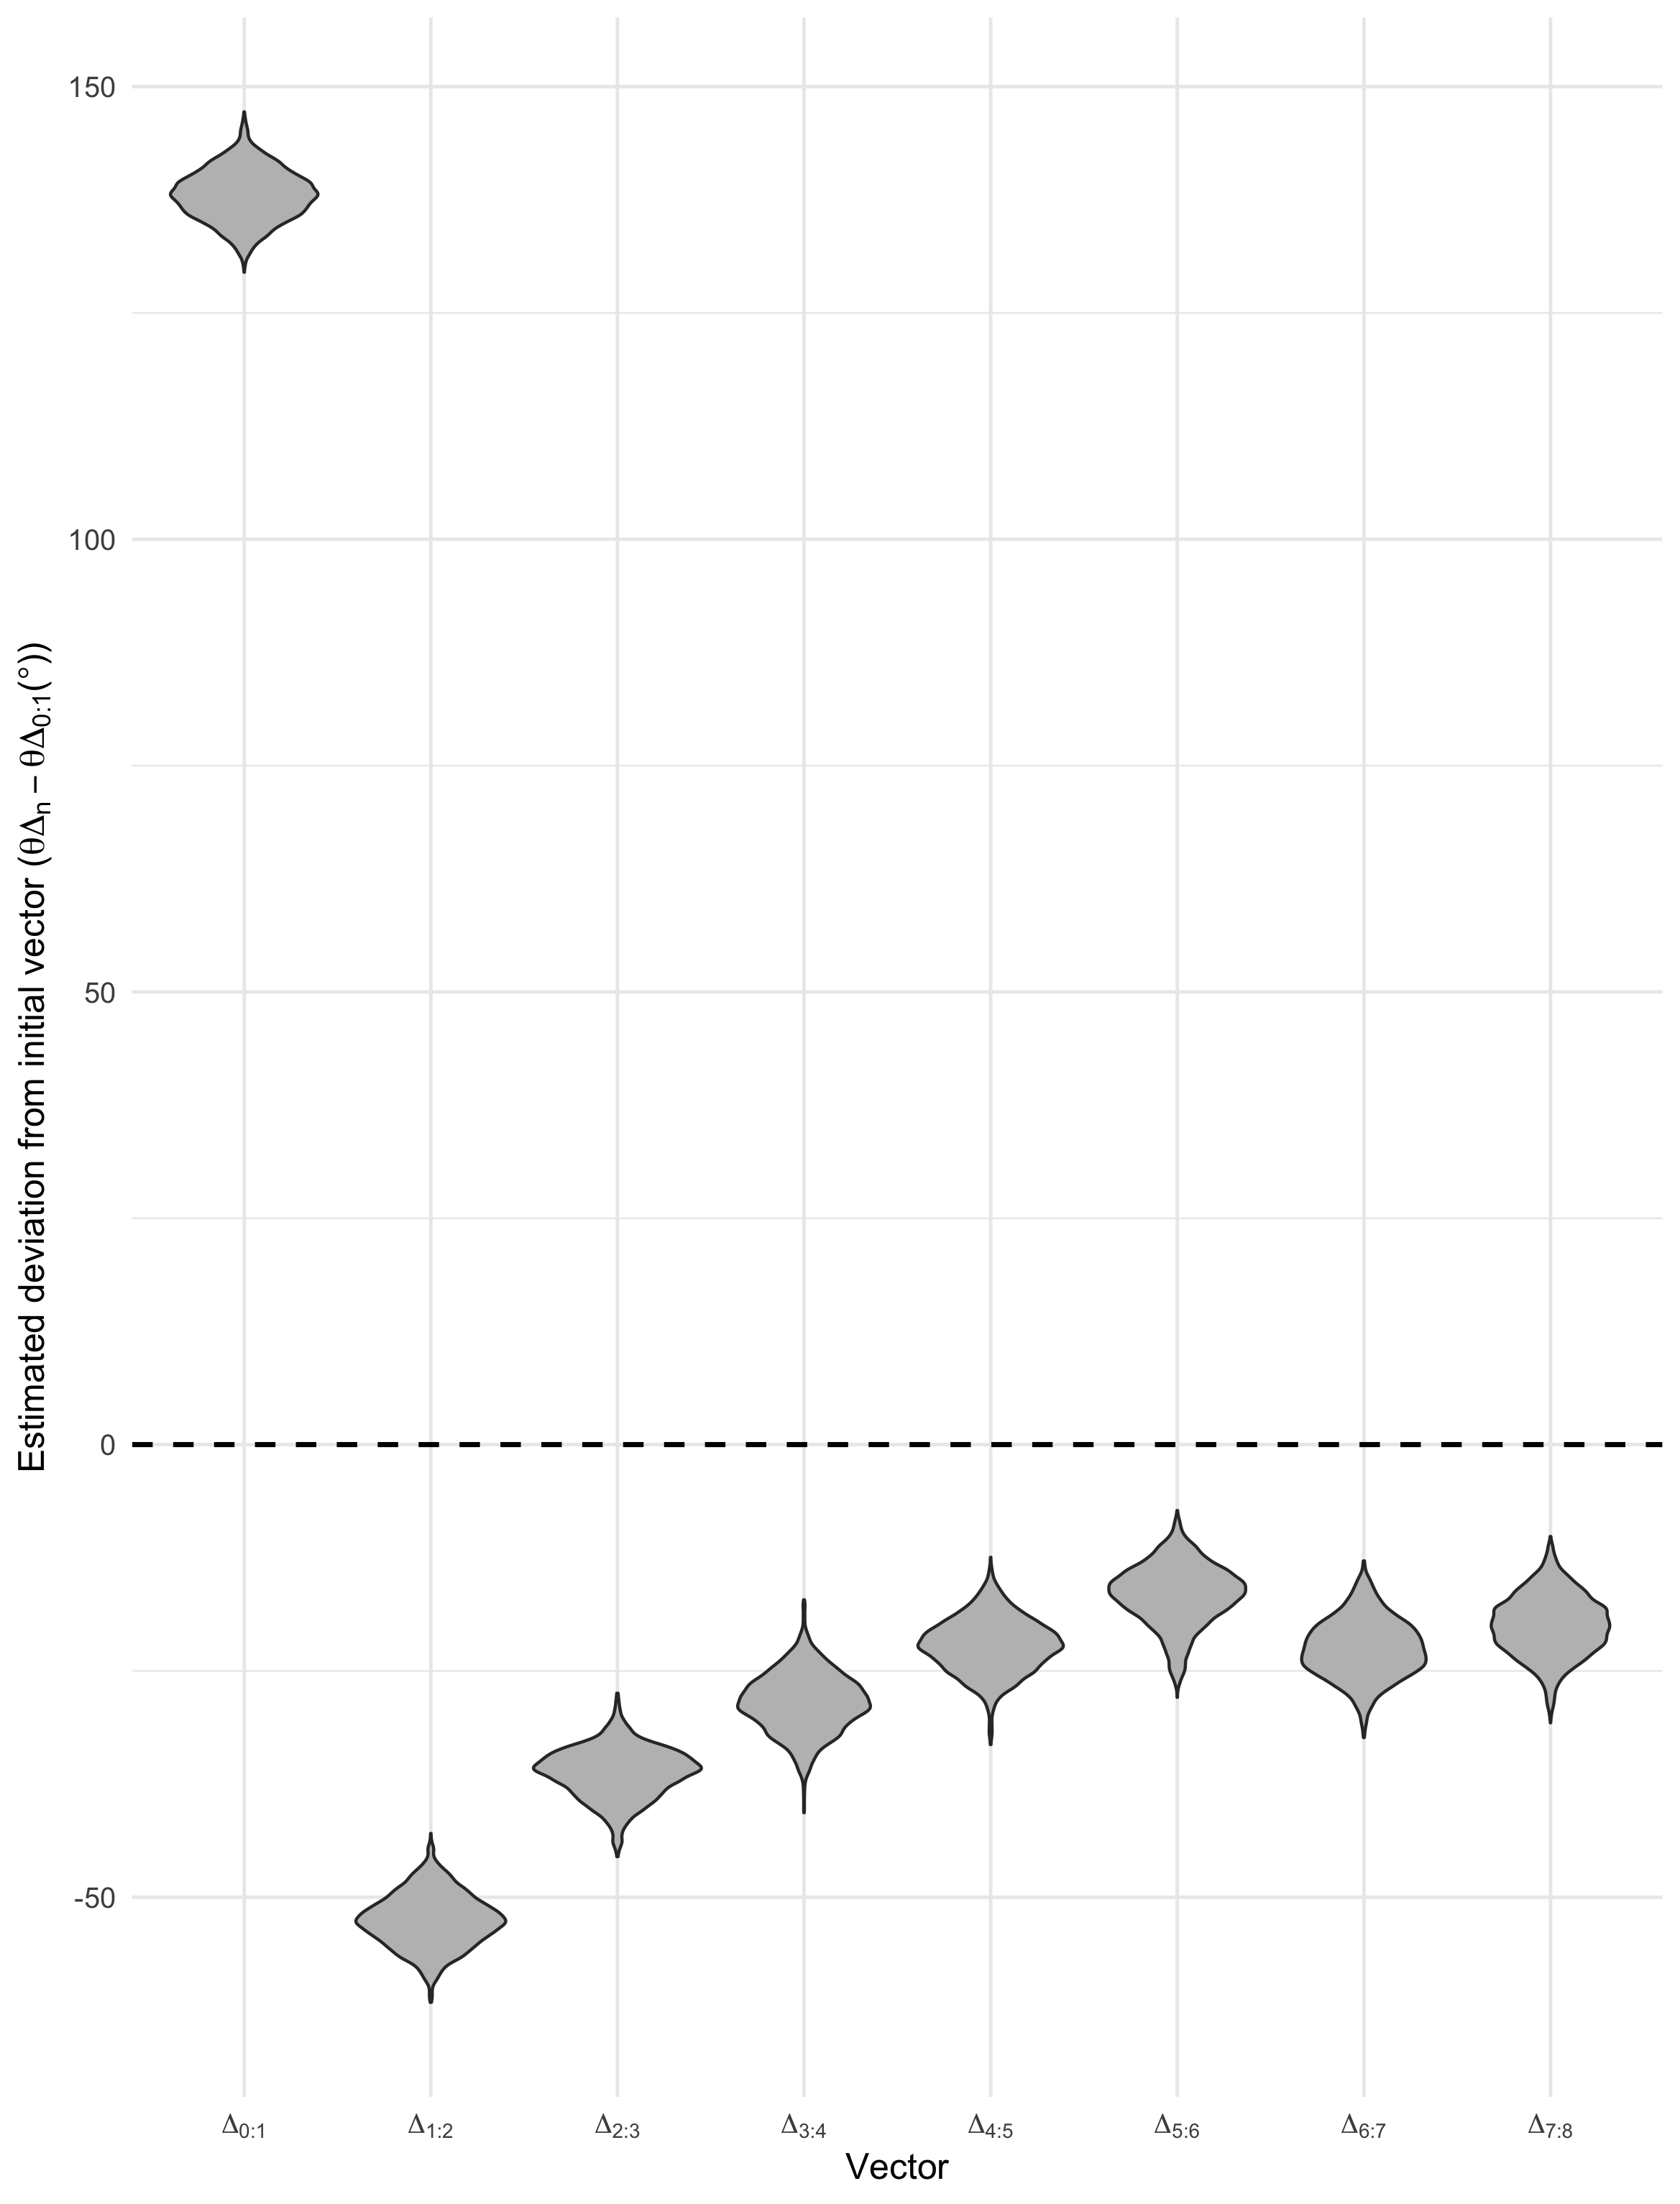

In [21]:
dp.display(dp.Image(os.path.join(fig_path, 'estimated_dt_vector_theta_deg_decay.png'),width=2000))

# Estimates of the mean theta distribution over time from the circular regression model. Note that these estimates are quite close to the mode of the actual theta distributions plotted for [Loki_0](https://github.com/kmbond/loki_0.5/blob/master/analysis/av_theta_distributions_density_loki_0.ipynb) and for [Loki_1](https://github.com/kmbond/loki_0.5/blob/master/analysis/av_theta_distributions_density.ipynb) (visual check that the model is capturing a sufficient degree of variance in the data + another sanity check that the package is working as expected).



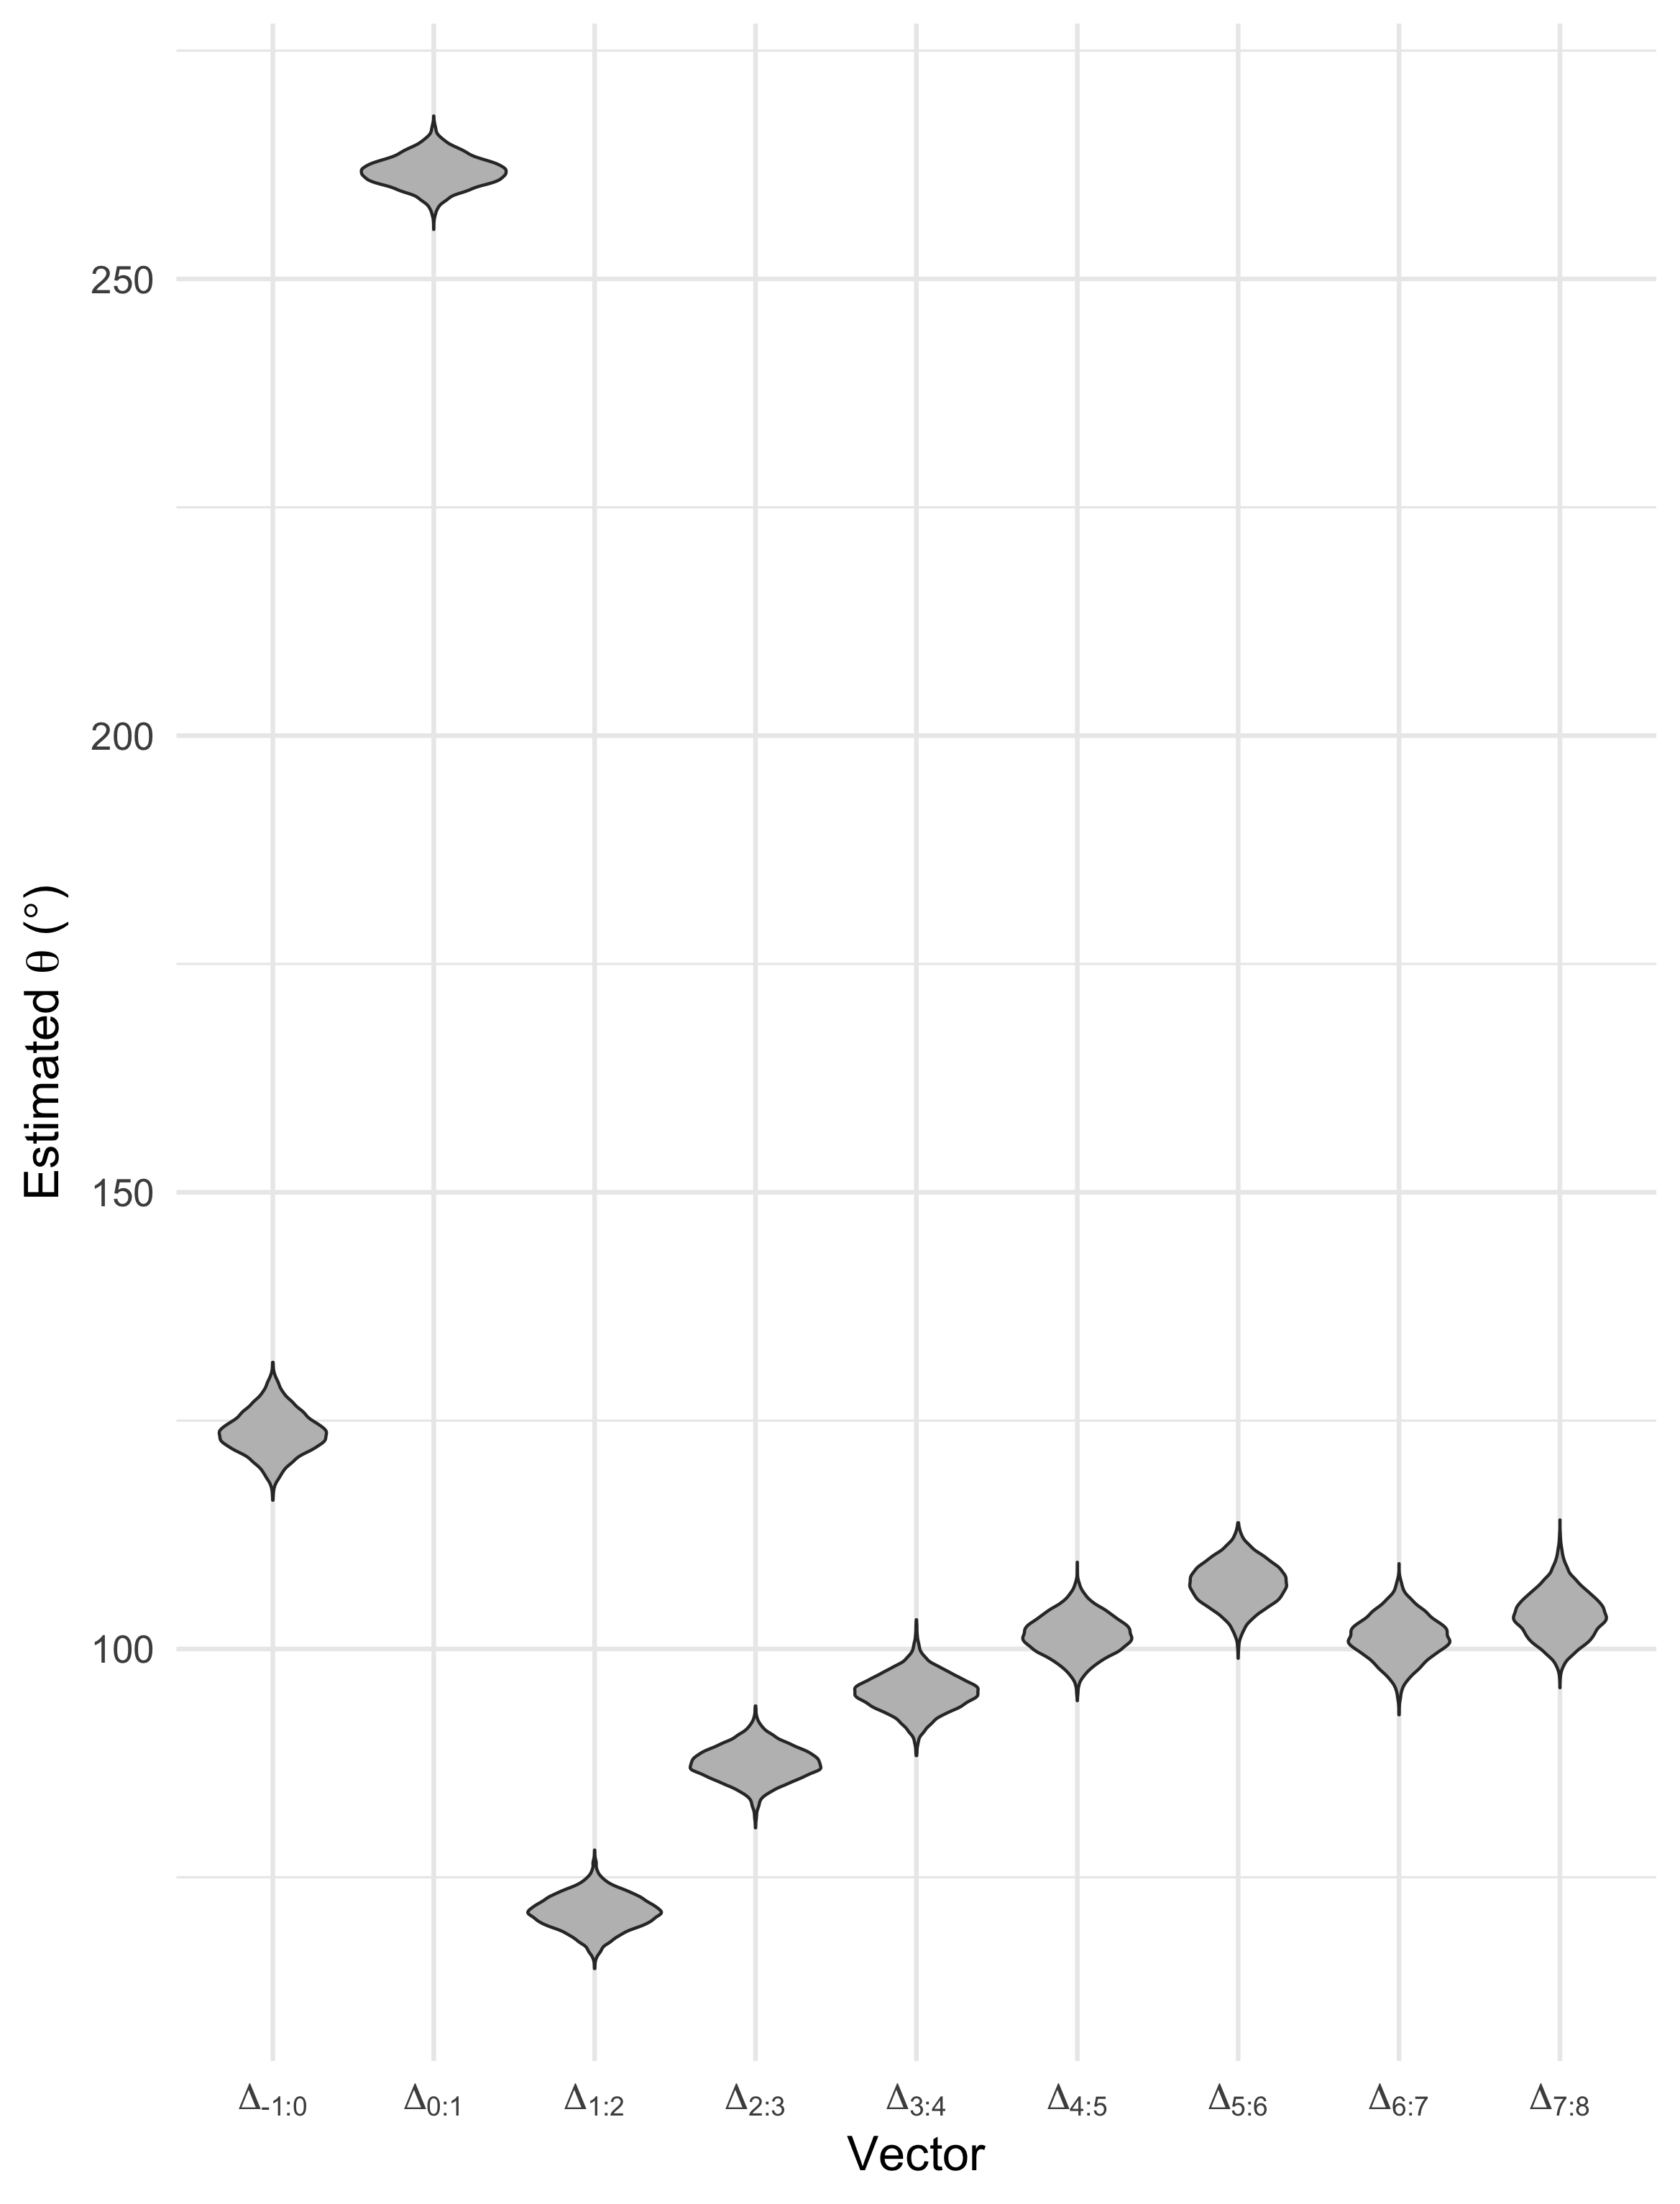

In [19]:
dp.display(dp.Image(os.path.join(fig_path, 'estimated_vector_theta_deg_decay.png'),width=2000))

# For a more quantitative estimate of the convergence of the theta distributions to stability, the posterior probability of sequential vector distributions being equal is plotted below. The notation on the x-axis indexes the vector distributions being compared. For example, $\theta\Delta_{01}$ refers to the posterior probability that the distribution of angles from  $\Delta_{-1:0}$ (or vector distribution 0) and $\Delta_{0:1}$ (or vector distribution 1) are equal. By $\theta\Delta_{34}$ the probability that theta distributions 3 and 4 are equal is above chance, suggesting that it might be reasonable to end the window used for loki_0.5 at the 4th theta distribution ($\Delta_{2:3}$ above).

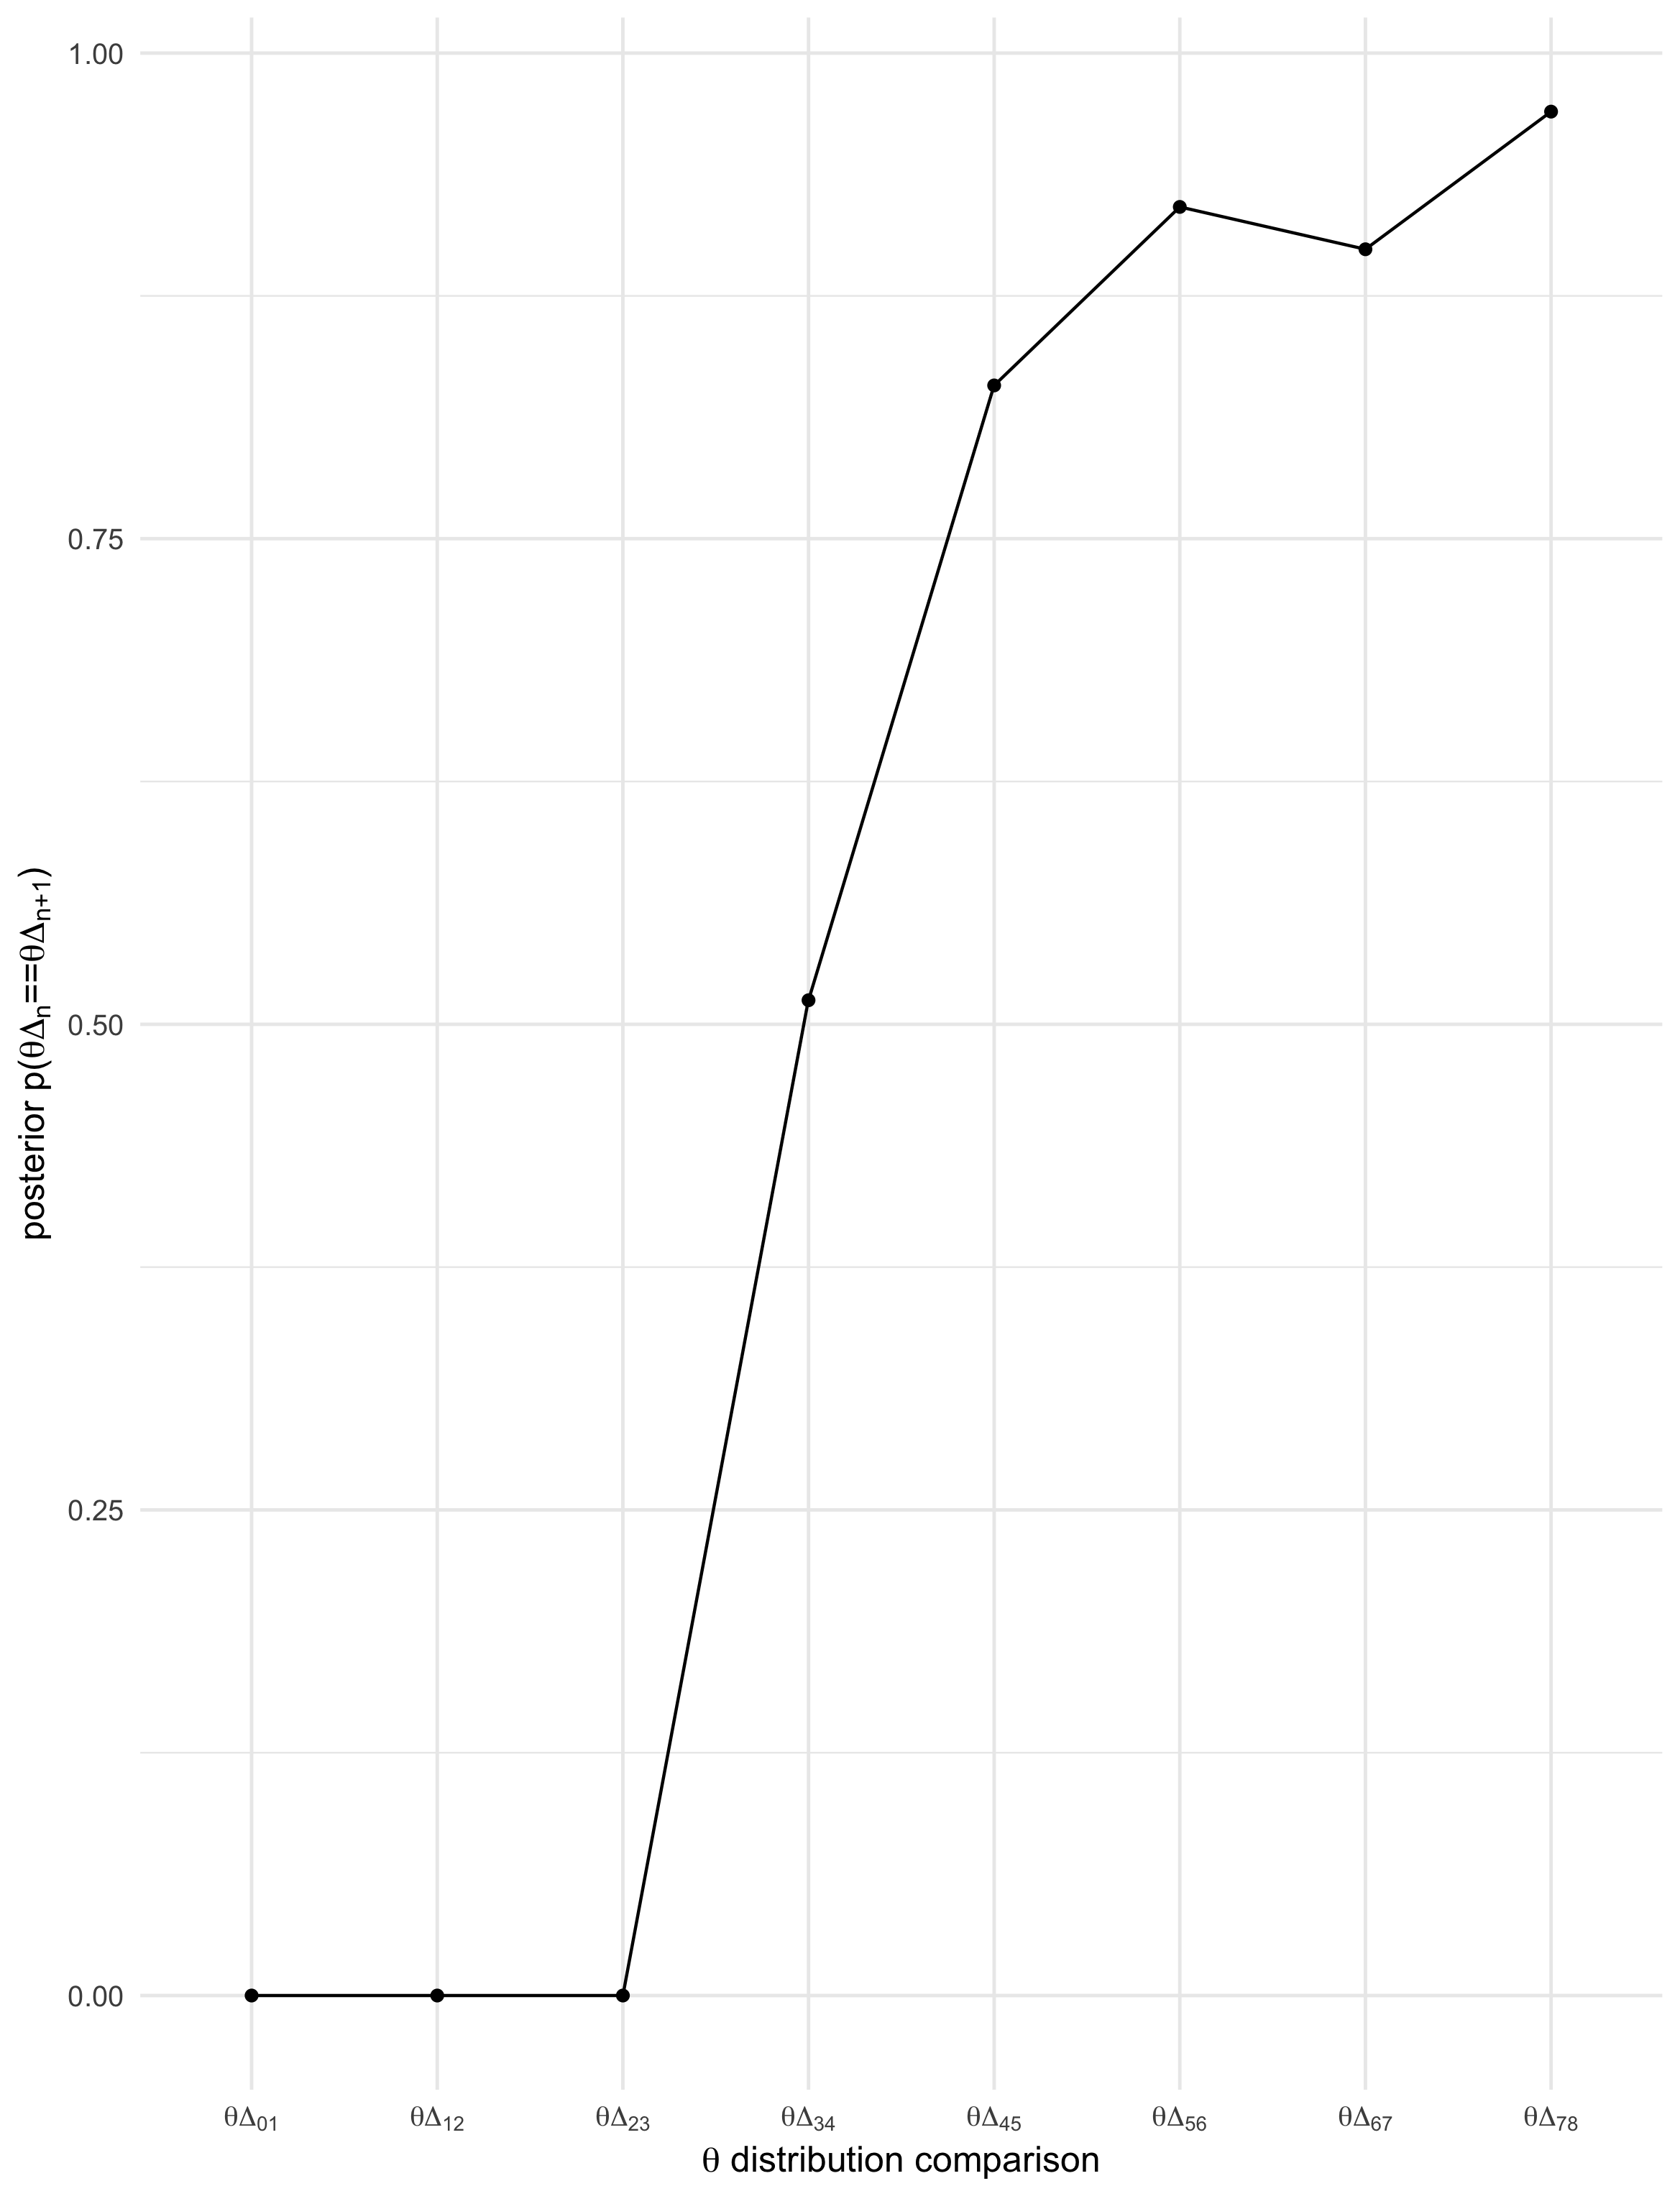

In [20]:
dp.display(dp.Image(os.path.join(fig_path, 'p_equal_sequential_theta_distributions.png'),width=2000))

# Conclusion: use the first 4 angular distributions (up to $\Delta_{2:3}$) formed by the vectors drawn from trials {-1,0}, {0,1}, {1,2} and {2,3} to estimate the circular regression models for loki_0.5?